In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import csv
import json
import seaborn

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
endpoint = "http://api.openweathermap.org/data/2.5/weather"
units = "Imperial"

Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lats = []
lngs = []
for x in range(500):
    lats.append(random.randrange(-90,90))
    lngs.append(random.randrange(-180,180))
locs =(zip(lats,lngs))



Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
#Uses Citipy to identify the nearest city
cities = []
weather_df = pd.DataFrame(columns = ['City','Temp','Humidity','Clouds','Wind_Speed'])
response_data = []

for key,value in locs:
    city = citipy.nearest_city(key,value)
    cities.append(city)

city_counter = 0
print('Beginning Data Retrieval')
print('-----------------------------')
for location in cities:
    print('Processing record '+str(city_counter)+' of '+ str(len(cities))+"|"+location.city_name)
    city_counter +=1
    
    try:
        params = {
            'appid': api_key,
            'units': units,
            'q': location.city_name+","+location.country_code
        }
                     
       
        response = requests.get(endpoint, params=params).json()
        response_data.append(response)
        target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (params['units'],api_key,location.city_name.strip())
        
        
    except:
        continue


print('Data Retrieval Complete')    


Beginning Data Retrieval
-----------------------------
Processing record 0 of 500|yellowknife
Processing record 1 of 500|punta arenas
Processing record 2 of 500|damghan
Processing record 3 of 500|albany
Processing record 4 of 500|nome
Processing record 5 of 500|litovko
Processing record 6 of 500|atuona
Processing record 7 of 500|dalby
Processing record 8 of 500|taolanaro
Processing record 9 of 500|bluff
Processing record 10 of 500|easton
Processing record 11 of 500|teknaf
Processing record 12 of 500|denpasar
Processing record 13 of 500|oranjemund
Processing record 14 of 500|tura
Processing record 15 of 500|klamath falls
Processing record 16 of 500|castro
Processing record 17 of 500|nanortalik
Processing record 18 of 500|hermanus
Processing record 19 of 500|aklavik
Processing record 20 of 500|lyubech
Processing record 21 of 500|la ronge
Processing record 22 of 500|zilupe
Processing record 23 of 500|bluff
Processing record 24 of 500|touros
Processing record 25 of 500|tasiilaq
Processing 

Processing record 220 of 500|bonfim
Processing record 221 of 500|manaure
Processing record 222 of 500|cabedelo
Processing record 223 of 500|dalen
Processing record 224 of 500|rikitea
Processing record 225 of 500|bredasdorp
Processing record 226 of 500|ayan
Processing record 227 of 500|busselton
Processing record 228 of 500|mahebourg
Processing record 229 of 500|machinga
Processing record 230 of 500|jamestown
Processing record 231 of 500|cape town
Processing record 232 of 500|sao joao da barra
Processing record 233 of 500|taolanaro
Processing record 234 of 500|ishigaki
Processing record 235 of 500|rikitea
Processing record 236 of 500|caravelas
Processing record 237 of 500|dalvik
Processing record 238 of 500|nouadhibou
Processing record 239 of 500|punta arenas
Processing record 240 of 500|ushuaia
Processing record 241 of 500|caravelas
Processing record 242 of 500|busselton
Processing record 243 of 500|rikitea
Processing record 244 of 500|fairbanks
Processing record 245 of 500|ancud
Proce

Processing record 443 of 500|saskylakh
Processing record 444 of 500|rikitea
Processing record 445 of 500|tumannyy
Processing record 446 of 500|arraial do cabo
Processing record 447 of 500|qaanaaq
Processing record 448 of 500|lompoc
Processing record 449 of 500|vardo
Processing record 450 of 500|port elizabeth
Processing record 451 of 500|bambous virieux
Processing record 452 of 500|ilulissat
Processing record 453 of 500|el balyana
Processing record 454 of 500|samarai
Processing record 455 of 500|conchas
Processing record 456 of 500|hobyo
Processing record 457 of 500|nouadhibou
Processing record 458 of 500|margate
Processing record 459 of 500|toulepleu
Processing record 460 of 500|husavik
Processing record 461 of 500|kharp
Processing record 462 of 500|ushuaia
Processing record 463 of 500|taolanaro
Processing record 464 of 500|hithadhoo
Processing record 465 of 500|stykkisholmur
Processing record 466 of 500|rikitea
Processing record 467 of 500|albany
Processing record 468 of 500|east lon

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [5]:
#creates a dataframe to store the responses and then save it to a csv    
response_df = pd.DataFrame(response_data)
response_df.to_csv('saved_data.csv')  

In [6]:
clean_respd = [s for s in response_data if s['cod']!='404' ]

temp_data = [response['main']['temp'] for response in clean_respd]
loc_data = [response['name'] for response in clean_respd]
humid_data = [response['main']['humidity'] for response in clean_respd]
cloud_data = [response['clouds']['all'] for response in clean_respd]
wind_data = [response['wind']['speed'] for response in clean_respd]
country_data = [response['sys']['country'] for response in clean_respd]
date_data = [response['dt'] for response in clean_respd]
lat_data = [response['coord']['lat'] for response in clean_respd]
lon_data = [response['coord']['lon'] for response in clean_respd]
max_temp_data = [response['main']['temp_max'] for response in clean_respd]


weather_df['Wind_Speed']=wind_data
weather_df['Clouds']=cloud_data
weather_df['Humidity']=humid_data
weather_df['Temp']=temp_data
weather_df['City']=loc_data
weather_df['Country'] = country_data
weather_df['Date'] = date_data
weather_df['Lat'] = lat_data
weather_df['Lng'] = lon_data
weather_df['Max Temp'] = max_temp_data

weather_df = weather_df[['City','Clouds','Country','Date','Humidity','Lat','Lng','Max Temp','Wind_Speed']]
weather_df.head()


,City,Clouds,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,Yellowknife,75,CA,1575500392,68,62.45,-114.38,-20.20,6.93
1,Punta Arenas,40,CL,1575500666,50,-53.16,-70.91,53.60,34.45
2,Damghan,0,IR,1575500666,80,36.17,54.34,43.39,2.15
3,Albany,90,AU,1575500436,77,-35.02,117.88,62.60,8.05
4,Nome,1,US,1575500666,52,30.04,-94.42,68.00,3.53


In [7]:
#creates dataframes for each plot for the sake of clean data management
temperature_df = pd.DataFrame(columns = ['Temps','Lats'])
humidity_df = pd.DataFrame(columns = ['Humidity','Lats'])
cloudiness_df = pd.DataFrame(columns = ['Cloudiness','Lats'])
windspeed_df = pd.DataFrame(columns = ['Wind_Speed','Lats'])

lat_data = [response['coord']['lat'] for response in clean_respd]

#fills in the latitude data values
windspeed_df['Lats'] = lat_data
cloudiness_df['Lats'] = lat_data
humidity_df['Lats'] = lat_data
temperature_df['Lats'] = lat_data

#fills in the requested value for each 
windspeed_df['Wind_Speed'] = weather_df['Wind_Speed']
cloudiness_df['Cloudiness'] = weather_df['Clouds']
humidity_df['Humidity'] = weather_df['Humidity']
temperature_df['Temps'] = weather_df['Max Temp']


Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

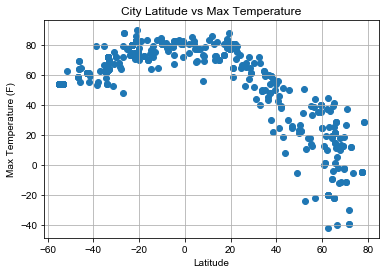

In [8]:
temperature_plot = plt.scatter(temperature_df['Lats'],temperature_df['Temps'])
plt.title('City Latitude vs Max Temperature')
plt.style.use('seaborn-dark')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Temp.png')
plt.show()


Latitude vs. Humidity Plot

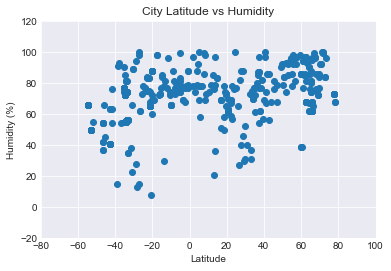

In [9]:
humidity_plot = plt.scatter(humidity_df['Lats'],humidity_df['Humidity'])
plt.title('City Latitude vs Humidity')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Humid.png')
plt.show()


 Latitude vs. Cloudiness Plot

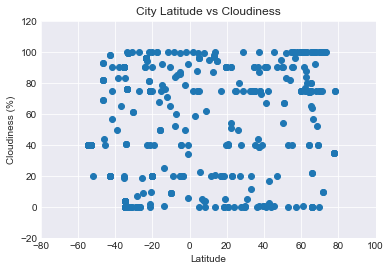

In [10]:
cloudiness_plot = plt.scatter(cloudiness_df['Lats'],cloudiness_df['Cloudiness'])
plt.title('City Latitude vs Cloudiness')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Cloud.png')
plt.show()


 Latitude vs. Wind Speed Plot

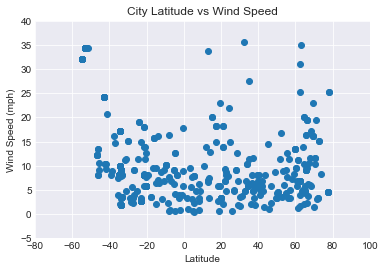

In [11]:
windspeed_plot = plt.scatter(windspeed_df['Lats'],windspeed_df['Wind_Speed'])
plt.title('City Latitude vs Wind Speed')
plt.style.use('seaborn-dark')
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat_Wind.png')
plt.show()


OBSERVATIONS

1) The max temperature trends in a way many would assume it would. Temps are lower the more you move North (negative latitude) and warmer as you move south (higher latitude). The highest temps are recorded the closer you get to the equater. 

2) Measuring the cloudiness by latitude was not effective as no clear trends were present. It appears that no matter what location, cloudiness is occasionally present. I would assume it's because cloudiness is more affected by Earth's surface as a whole instead of by certain environments.

3) The majority of wind speeds ranged from 0mph to 20mph which is a pretty standard range. The few locations with higher wind speed, are presumably locations with higher elevations/mountainous regions. 
